# HR Employee Attrition Analysis,
    This notebook performs exploratory data analysis (EDA) and insights extraction on the WA_Fn-UseC_-HR-Employee-Attrition dataset using both Pandas and SQL (SQLite)."

In [1]:
import pandas as pd
import sqlite3
import plotly.express as px
# Load dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
print("First 5 rows:")
display(df.head())

print(f"\n Shape of dataset: {df.shape[0]} rows × {df.shape[1]} columns")

print("\n Info:")
df.info()

print("\n Missing values per column:")
print(df.isnull().sum())

print("\n Duplicates:", df.duplicated().sum())

print("\n Summary stats:")
display(df.describe())

First 5 rows:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2



 Shape of dataset: 1470 rows × 35 columns

 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### We can see that there are 1470 employees with no missing values, and no Duplicates, making the dataset clean for analysis.

## Setup SQLite database
Load the dataset,

We load the HR dataset from Kaggle into a Pandas DataFrame to begin exploratory data analysis.

In [15]:
conn = sqlite3.connect('hr.db')
cursor = conn.cursor()
# Insert DataFrame into SQLite table named 'employee'
df.to_sql('employee', conn, index=False, if_exists='replace')

1470

## 1. Employees who have not left the company

1. How many employees are there?
SQL: 1233 employees
Pandas: 1233 employees


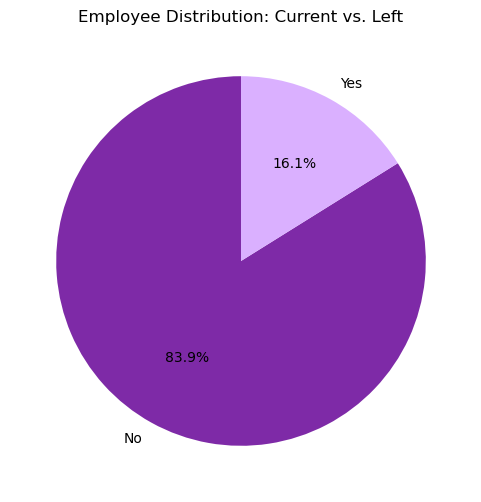

In [24]:
print("1. How many employees are there?")
# SQL way
query='''
SELECT COUNT(*) FROM employee WHERE Attrition = 'No';'''
cursor.execute(query)
results = cursor.fetchall() 
print("SQL:", results[0][0] ,"employees")
# Pandas way
employees=df[df['Attrition'] == 'No'].shape[0]
print("Pandas:", employees , "employees")

# visualization of employee distribution by Attrition status
import matplotlib.pyplot as plt

# Count of employees by Attrition
attrition_counts = df['Attrition'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90, colors=["#7E2AA7","#DAB0FF"])
plt.title("Employee Distribution: Current vs. Left")
plt.show()

Out of 1,470 employees, 1,233 are currently employed = 83%, while 237 have left the company. This indicates that approximately 16% of employees have experienced attrition.

In [17]:
fig = px.imshow(
    attrition_rate.unstack(),
    labels=dict(x="Job Role", y="Department", color="Attrition Rate (%)"),
    x=attrition_rate.unstack().columns,
    y=attrition_rate.unstack().index,
    color_continuous_scale="Reds",
    aspect="auto",
    title="Attrition Rate (%) by Department and Job Role"
)
fig.show()

## 2. Employee count per department

In [30]:
print("2. What is the employee count for each department?")
query2 = '''SELECT Department, COUNT(*) as EmployeeCount
FROM employee
GROUP BY Department;'''
cursor.execute(query2)
results = cursor.fetchall() 
print("Employee count in each Department (SQL):")
for department, count in results:
    print(f"{department}: {count}")
# Pandas way
dept_counts = df.groupby('Department').size()
print("Pandas way:")
for department, count in dept_counts.items():
    print(f"{department}: {count}")

#visualization
# Employee count per department
dept_counts = df['Department'].value_counts().reset_index()
dept_counts.columns = ['Department', 'EmployeeCount']
# Bar chart
fig = px.bar(dept_counts, x='Department', y='EmployeeCount',
             color='Department', title='Employee Count per Department',
             color_continuous_scale=px.colors.sequential.Purples)
fig.show()

2. What is the employee count for each department?
Employee count in each Department (SQL):
Human Resources: 63
Research & Development: 961
Sales: 446
Pandas way:
Human Resources: 63
Research & Development: 961
Sales: 446


Research & Development has the largest workforce (961 employees), followed by Sales (446 employees), and Human Resources has the smallest (63 employees). This helps HR understand workforce distribution across departments.

## 3. Average monthly income per job role

In [8]:
print(" 3. What is the average monthly income for employees in each job role?")
query3 = ''' SELECT JobRole, AVG(MonthlyIncome) as AverageMonthlyIncome FROM employee GROUP BY JobRole; '''
cursor.execute(query3)
results = cursor.fetchall()  
print("Average monthly income for each job role (SQL):")
for job_role, avg_income in results:
    print(f"{job_role}: ${avg_income:.2f}")
# Pandas way
avg_income_roles = df.groupby('JobRole')['MonthlyIncome'].mean()
print("Pandas way:")
for job_role, avg_income in avg_income_roles.items():
    print(f"{job_role}: ${avg_income:.2f}")

 3. What is the average monthly income for employees in each job role?
Average monthly income for each job role (SQL):
Healthcare Representative: $7528.76
Human Resources: $4235.75
Laboratory Technician: $3237.17
Manager: $17181.68
Manufacturing Director: $7295.14
Research Director: $16033.55
Research Scientist: $3239.97
Sales Executive: $6924.28
Sales Representative: $2626.00
Pandas way:
Healthcare Representative: $7528.76
Human Resources: $4235.75
Laboratory Technician: $3237.17
Manager: $17181.68
Manufacturing Director: $7295.14
Research Director: $16033.55
Research Scientist: $3239.97
Sales Executive: $6924.28
Sales Representative: $2626.00


## 4. Top 5 employees by performance rating

In [9]:
print("4. who are the top 5 employees by performance rating?")
#SQl
query4 = ''' SELECT EmployeeNumber, PerformanceRating FROM employee 
ORDER BY PerformanceRating DESC LIMIT 5; '''
cursor.execute(query4)
results = cursor.fetchall()  
print("the top 5 employees by performance rating (SQL):")
for emp_num, rating in results:
    print(f"EmployeeNumber: {emp_num}, PerformanceRating: {rating}")
# Pandas way
top5 = df.sort_values('PerformanceRating', ascending=False)[['EmployeeNumber', 'PerformanceRating']].head(5)
print("Pandas way:")
for _, row in top5.iterrows():
    print(f"EmployeeNumber: {row['EmployeeNumber']}, PerformanceRating: {row['PerformanceRating']}")

4. who are the top 5 employees by performance rating?
the top 5 employees by performance rating (SQL):
EmployeeNumber: 2, PerformanceRating: 4
EmployeeNumber: 10, PerformanceRating: 4
EmployeeNumber: 11, PerformanceRating: 4
EmployeeNumber: 12, PerformanceRating: 4
EmployeeNumber: 27, PerformanceRating: 4
Pandas way:
EmployeeNumber: 1108, PerformanceRating: 4
EmployeeNumber: 867, PerformanceRating: 4
EmployeeNumber: 872, PerformanceRating: 4
EmployeeNumber: 874, PerformanceRating: 4
EmployeeNumber: 1772, PerformanceRating: 4


## 5. Department with highest average performance rating

In [10]:
print("5. which department has the highest average performance rating?")
#SQL
query5 = ''' SELECT Department, AVG(PerformanceRating) as AvgPerformanceRating
FROM employee GROUP BY Department ORDER BY AvgPerformanceRating DESC LIMIT 1; '''
cursor.execute(query5)
results = cursor.fetchall()
print("Department with the highest average performance rating(SQL):")
for department, avg_rating in results:
    print(f"{department}: {avg_rating:.2f}")
# Pandas way
dept_avg_perf = df.groupby('Department')['PerformanceRating'].mean()
best_dept = dept_avg_perf.idxmax()
best_rating = dept_avg_perf.max()
print("Pandas way:")
print(f"{best_dept}: {best_rating:.2f}")

5. which department has the highest average performance rating?
Department with the highest average performance rating(SQL):
Research & Development: 3.16
Pandas way:
Research & Development: 3.16


## 6. Attrition rate by job role and department

In [11]:
print("6. Attrition rate by job role and department (SQL)")
# SQL way
query6 = """
SELECT Department, JobRole,
       ROUND(SUM(CASE WHEN Attrition='Yes' THEN 1 ELSE 0 END)*100.0/COUNT(*),2) AS AttritionRate
FROM employee GROUP BY Department, JobRole ORDER BY AttritionRate DESC;"""
cursor.execute(query6)
results = cursor.fetchall()
for dept, role, rate in results:
    print(f"{dept} - {role}: {rate}%")
# Pandas way
attrition_counts = df.groupby(['Department', 'JobRole'])['Attrition'].value_counts().unstack().fillna(0)
attrition_rate = (attrition_counts['Yes'] / attrition_counts.sum(axis=1) * 100).round(2)
print("Pandas way:")
for idx, rate in attrition_rate.sort_values(ascending=False).items():
    print(f"{idx[0]} - {idx[1]}: {rate}%")

6. Attrition rate by job role and department (SQL)
Sales - Sales Representative: 39.76%
Research & Development - Laboratory Technician: 23.94%
Human Resources - Human Resources: 23.08%
Sales - Sales Executive: 17.48%
Research & Development - Research Scientist: 16.1%
Research & Development - Manufacturing Director: 6.9%
Research & Development - Healthcare Representative: 6.87%
Research & Development - Manager: 5.56%
Sales - Manager: 5.41%
Research & Development - Research Director: 2.5%
Human Resources - Manager: 0.0%
Pandas way:
Sales - Sales Representative: 39.76%
Research & Development - Laboratory Technician: 23.94%
Human Resources - Human Resources: 23.08%
Sales - Sales Executive: 17.48%
Research & Development - Research Scientist: 16.1%
Research & Development - Manufacturing Director: 6.9%
Research & Development - Healthcare Representative: 6.87%
Research & Development - Manager: 5.56%
Sales - Manager: 5.41%
Research & Development - Research Director: 2.5%
Human Resources - Manag

## 7. Correlation between monthly income and attrition

In [12]:
print("7. Correlation between monthly income and attrition (SQL)")
# SQL way
query7 = """SELECT Attrition, AVG(MonthlyIncome)
FROM employee GROUP BY Attrition;"""
cursor.execute(query7)
results = cursor.fetchall()
for attrition, avg_income in results:
    print(f"{attrition}: ${avg_income:.2f}")
# Pandas way
income_by_attrition = df.groupby('Attrition')['MonthlyIncome'].mean()
print("Pandas way:")
for attrition, avg_income in income_by_attrition.items():
    print(f"{attrition}: ${avg_income:.2f}")

7. Correlation between monthly income and attrition (SQL)
No: $6832.74
Yes: $4787.09
Pandas way:
No: $6832.74
Yes: $4787.09


## 8. Performance rating vs attrition

In [13]:
print("8. Performance rating vs attrition (SQL)")
# SQL way
query8 = """
SELECT PerformanceRating, Attrition, COUNT(*)
FROM employee
GROUP BY PerformanceRating, Attrition
ORDER BY PerformanceRating DESC;
"""
cursor.execute(query8)
results = cursor.fetchall()
for rating, attrition, count in results:
    print(f"PerformanceRating: {rating}, Attrition: {attrition}, Count: {count}")
# Pandas way
perf_attrition = df.groupby(['PerformanceRating', 'Attrition']).size().unstack(fill_value=0)
print("Pandas way:")
print(perf_attrition)

8. Performance rating vs attrition (SQL)
PerformanceRating: 4, Attrition: No, Count: 189
PerformanceRating: 4, Attrition: Yes, Count: 37
PerformanceRating: 3, Attrition: No, Count: 1044
PerformanceRating: 3, Attrition: Yes, Count: 200
Pandas way:
Attrition            No  Yes
PerformanceRating           
3                  1044  200
4                   189   37


## 9. Job Role and Overtime vs Attrition

In [14]:
print("9. How do Job Role and Overtime status affect employee attrition?")
# SQL version
query10 = """
SELECT JobRole, OverTime,
       ROUND(SUM(CASE WHEN Attrition='Yes' THEN 1 ELSE 0 END)*100.0/COUNT(*),2) AS AttritionRate,
       COUNT(*) AS EmployeeCount
FROM employee
GROUP BY JobRole, OverTime
ORDER BY AttritionRate DESC, EmployeeCount DESC;
"""
cursor.execute(query10)
results = cursor.fetchall()

# Convert SQL results to DataFrame
sql_df = pd.DataFrame(results, columns=['JobRole', 'OverTime', 'AttritionRate', 'EmployeeCount'])
print("Attrition by Job Role and Overtime (from SQL):")
display(sql_df)

# Pandas calculation
job_ot_attrition = (
    df.groupby(['JobRole', 'OverTime'])['Attrition']
      .value_counts()
      .unstack(fill_value=0)
)

# Add EmployeeCount and AttritionRate
job_ot_attrition['EmployeeCount'] = job_ot_attrition.sum(axis=1)
job_ot_attrition['AttritionRate'] = (job_ot_attrition['Yes'] / job_ot_attrition['EmployeeCount'] * 100).round(2)

# Reset index for readability
job_ot_attrition = job_ot_attrition.reset_index()

print("\nAttrition by Job Role and Overtime (from Pandas):")
display(job_ot_attrition)

9. How do Job Role and Overtime status affect employee attrition?
Attrition by Job Role and Overtime (from SQL):


,JobRole,OverTime,AttritionRate,EmployeeCount
0,Sales Representative,Yes,66.67,24
1,Laboratory Technician,Yes,50.00,62
2,Human Resources,Yes,38.46,13
3,Research Scientist,Yes,34.02,97
4,Sales Executive,Yes,32.98,94
5,Sales Representative,No,28.81,59
6,Human Resources,No,17.95,39
7,Laboratory Technician,No,15.74,197
8,Manager,Yes,14.81,27
9,Sales Executive,No,11.21,232



Attrition by Job Role and Overtime (from Pandas):


Attrition,JobRole,OverTime,No,Yes,EmployeeCount,AttritionRate
0,Healthcare Representative,No,87,7,94,7.45
1,Healthcare Representative,Yes,35,2,37,5.41
2,Human Resources,No,32,7,39,17.95
3,Human Resources,Yes,8,5,13,38.46
4,Laboratory Technician,No,166,31,197,15.74
5,Laboratory Technician,Yes,31,31,62,50.00
6,Manager,No,74,1,75,1.33
7,Manager,Yes,23,4,27,14.81
8,Manufacturing Director,No,100,6,106,5.66
9,Manufacturing Director,Yes,35,4,39,10.26
